# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [10]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
train_images.shape

(60000, 784)

In [14]:
len(train_labels)

60000

In [15]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
test_images.shape

(10000, 784)

In [17]:
len(test_labels)

10000

In [18]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax") # 두 번째 layer -> 10-way softmax classification layer(return 10 probability scores)
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2547 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1036 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0690 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0487 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9887


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] # highest probability at index 7

array([3.1383127e-10, 1.5299925e-11, 8.0304380e-07, 8.4166986e-06,
       4.4621343e-14, 1.1900893e-08, 1.4670832e-15, 9.9999070e-01,
       1.1913334e-09, 3.9285293e-08], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999907

In [15]:
test_labels[0]

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}") # test_acc < training_acc (overfitting)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9776
test_acc: 0.9775999784469604


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim # 차원

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

- numpy in axes : 차원 
- Shape :  matrix의 경우 (3,5), 3차원 텐서의 경우(3,3,5), vector의 경우 (5,)
- Data type


In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [29]:
train_images.shape # 60000 matrices of 28*28 integers

(60000, 28, 28)

In [30]:
train_images.dtype # 8bit integer

dtype('uint8')

**Displaying the fourth digit**

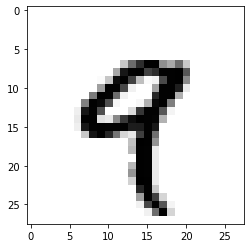

In [27]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [31]:
my_slice = train_images[10:100] # 텐서의 특정 요소 선택 : 텐서 슬라이싱 
my_slice.shape 

(90, 28, 28)

In [32]:
my_slice = train_images[10:100, :, :] # : 는 전체 축 선택 
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[:, 14:, 14:] # bottom - right pixel 

In [35]:
my_slice = train_images[:, 7:-7, 7:-7] # same 

### The notion of data batches

In [36]:
batch = train_images[:128]

In [37]:
batch = train_images[128:256]

In [39]:
n = 3
batch = train_images[128 * n:128 * (n + 1)] # nth batch

in batch tensor , the first axis  = batch axis / batch dimension

### Real-world examples of data tensors

- vector data
- timeserises data or sequence data
- lmages
- video

### Vector data

- 가장 흔한 형태
- rank-2 tensors of shape(samples,features)

> ex) age, gender, imcome을 고려하는 100,000 people -> (100000,3)



### Timeseries data or sequence data

- rank-3 tensors of shape(samples, timesteps, features)
- 시간 축은 관례상 두번째 축 (axis of index 1)



> 매분의 주가, 과거 1분간 최고가/최저가를 기록하는 데이터. 거래일 중 390분, 250일분의 데이터 기록 -> ( 250,390,3 )





### Image data

- rank-4 tensors of shape(samples, height, width, channels)
- MNIST의 이미지들은 단일 색상 채널만 있어 rank-3 tensor에 저장 가능하나 일반적으로 이미지들은 rank-4 tensor에 저장한다

### Video data

- rank-5 tensors of shape(samples, frames, height, width, channels) 


> 60,second, 144*256 youtube video clip sampled at 4 frames per second would have 240 frames, 4 such videoes -> (4, 240, 144,256, 3)



## The gears of neural networks: tensor operations

### Element-wise operations

relu 함수 -> 양수면 그대로 출력, 음수면 0을 출력

In [45]:
def naive_relu(x):
    assert len(x.shape) == 2 # assert는 이 조건이 참일때 코드는 내가 보장한다. 이 조건은 올바르다! 하지만 이 조건이 거짓이라는 것은 내가 보증하지 않은 동작이다. 그러니 AssertionError를 발생해라.
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

같은 원리로 덧셈도 가능 

In [44]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

numpy를 사용하면 매우 빠르게 처리됨
  


In [46]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [47]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.19 s


### Broadcasting

shapes of two tensors가 다를 때 -> smaller tensor가 broadcast됨  
1. 큰 tensor와 ndim이 일치하도록 작은 tensor에 broadcast axes 추가
2. 작은 tensor은 새로운 축과 함께 반복됨 

In [51]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [52]:
y = np.expand_dims(y, axis=0) # shape of y : (1,10)

In [53]:
Y = np.concatenate([y] * 32, axis=0) # repeat y 32 times along axis 0

In [54]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [56]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [57]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [59]:
# vector * vector
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [60]:
naive_vector_dot(x, y) # dot product between two vectors is a scalar

6.779808858112942

In [61]:
# matrix * vector
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] # first dimension of x = 0th dimension of y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [62]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [63]:
# matrix * matrix
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [64]:
train_images = train_images.reshape((60000, 28 * 28))

In [65]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [66]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [67]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

- 모든 tensor은 기하학적 의미로 해석될 수 있다. 
- geometric operation(translation, rotation, scaling, skewing 등)은 tensor operation으로 표현할 수 있다. 

### A geometric interpretation of deep learning

- neural networks는 tensor operations의 chains들을 포함하며, 이러한 tensor operation은 단순히 input data에 대한 geometric transformation에 불과하다.
- 3D에서, 다른 색의 색종이 2장이 있는데 이 두개를 함게 구겼다가 분류하는 문제와 같다.   
 -> 함께 구긴 2장의 색종이 ( input )  
 -> 두 장을 분류하기 위해 종이를 이동시키는 과정 ( neural network )
  

## The engine of neural networks: gradient-based optimization



> output = relu(dot(input,w)+w)

w & b -> tensor that are attributes of the layer.  
w : weights(가중치), kernel  
b : trainable parameters, bias

  
가중치 행렬은 처음에 random으로 채워지나, traning을 반복하며 점진적으로 조정된다.

*Traing Loop*
1. traing sample의 x와 대응하는 y_true
2. x에서 모델을 돌린다(forward pass) -> y_pred 얻는다
3. model의 loss를 계산한다. (y_true와 y_pred의 불일치 척도)
4. 가중치를 업그레이드한다.

Step 4 -> how?

방법1) considered one scalar coefficient제외 나머지 값 동결하고 다른 coefficient를 넣어보는 방법 -> 모든 coefficient에 대해 반복   
  -> 비효율적  
방법2) gradient decent  


### What's a derivative?

미분, 도함수, 기울기 ... 

### Derivative of a tensor operation: the gradient

- derivative -> shape가 1 감소  
- derivative 조건 : 함수가 연속적이고 매끄러운 경우 적용가능
- derivative tensor operation = **gradient**
- 

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule


```
def fhgj(x):
  x1 = j(x)
  x2 = h(x1)
  x3 = g(x2)
  y = f(x3)
  return y 
```
grad(y,x) == grad(y,x3) * grad(x3,x2) * grad(x2,x1) * grad(x1,x)  

applying chain rule to the computation of gradient values of a neural network -> backpropagation



#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

gradient tape -> python API, record the tensor operation 

In [1]:
import tensorflow as tf
x = tf.Variable(0.) # 초기 인스턴스 생성 
with tf.GradientTape() as tape: # open gradient tape 
    y = 2 * x + 3 
grad_of_y_wrt_x = tape.gradient(y, x) # ues the tape to retrieve the gradient of output y

In [6]:
x = tf.Variable(tf.random.uniform((2, 2))) # uniform((2,2))의 값은 모두 0
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [8]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b # matmul = dot product in tensorflow 
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) # list of two tensors with the same shapes as W and b, respectively 

## Looking back at our first example

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2528 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1022 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0487 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0360 - accuracy: 0.9893


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [24]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size) # create matrix W, shaped (input_size, output_size), initialized with random values
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)  # tensor 저장 

        b_shape = (output_size,) # create vector b, shaped(output_size), initialized with 0 
        b_initial_value = tf.zeros(b_shape) 
        self.b = tf.Variable(b_initial_value) # tensor 저장 

    def __call__(self, inputs): # apply the forward pass 
        return self.activation(tf. matmul(inputs, self.W) + self.b)

    @property
    def weights(self): 
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary